In [2]:
import pandas as pd

# Load the dataset with low_memory=False and set dtype for 'Value' as string
file_path = "whodata2/merged_data_cleaned.csv"
df = pd.read_csv(file_path, low_memory=False, dtype={"Value": str})

# Confirm changes
print("Dataset Loaded Successfully!")
print(df.dtypes)


Dataset Loaded Successfully!
Id                                     int64
IndicatorCode                         object
SpatialDimension                      object
SpatialDimensionValueCode             object
ParentLocationCode                    object
ParentLocation                        object
TimeDimension                         object
TimeDim                                int64
DisaggregatingDimension1              object
DisaggregatingDimension1ValueCode     object
DisaggregatingDimension2              object
DisaggregatingDimension2ValueCode     object
Value                                 object
NumericValue                         float64
Date                                  object
TimeDimensionValue                     int64
TimeDimensionBegin                    object
TimeDimensionEnd                      object
dtype: object


In [3]:
import pandas as pd

# Reload dataset with low_memory=False to suppress warnings
file_path = "whodata2/merged_data_cleaned.csv"
df = pd.read_csv(file_path, low_memory=False)

# Print first few rows to confirm successful loading
print("Dataset Loaded Successfully!")
print(df.head())

# Print column names
print("Column Names:", df.columns.tolist())

# List of numeric columns to convert (only if they exist)
numeric_columns = ["NumericValue", "Low", "High", "Comments"]
existing_numeric_columns = [col for col in numeric_columns if col in df.columns]

# Print existing numeric columns
print("Numeric Columns to Convert:", existing_numeric_columns)

# Convert numeric columns (only the ones that exist)
if existing_numeric_columns:
    df[existing_numeric_columns] = df[existing_numeric_columns].apply(pd.to_numeric, errors="coerce")

# Convert date columns (check if they exist before conversion)
date_columns = ["Date", "TimeDimensionBegin", "TimeDimensionEnd"]
existing_date_columns = [col for col in date_columns if col in df.columns]

# Print existing date columns
print("Date Columns to Convert:", existing_date_columns)

if existing_date_columns:
    df[existing_date_columns] = df[existing_date_columns].apply(pd.to_datetime, errors="coerce")

# Save the properly formatted dataset
df.to_csv(file_path, index=False)

# Confirm changes
print("Updated Data Types:")
print(df.dtypes)

print("Dataset updated successfully!")


Dataset Loaded Successfully!
     Id   IndicatorCode SpatialDimension SpatialDimensionValueCode  \
0  1068  MDG_0000000026          COUNTRY                       ALB   
1  1357  MDG_0000000026          COUNTRY                       BLZ   
2  1600  MDG_0000000026          COUNTRY                       ZWE   
3  2642  MDG_0000000026          COUNTRY                       HUN   
4  3435  MDG_0000000026          COUNTRY                       VEN   

  ParentLocationCode ParentLocation TimeDimension  TimeDim  \
0                EUR         Europe          YEAR     2016   
1                AMR       Americas          YEAR     2005   
2                AFR         Africa          YEAR     1988   
3                EUR         Europe          YEAR     2018   
4                AMR       Americas          YEAR     2016   

  DisaggregatingDimension1 DisaggregatingDimension1ValueCode  \
0                  Unknown                           Unknown   
1                  Unknown                       

In [4]:
# Reload the dataset to check the changes
df = pd.read_csv(file_path, low_memory=False)

# Display data types
print("Column Data Types:\n", df.dtypes)

# Display the first few rows
print("\nFirst 5 Rows:\n", df.head())


Column Data Types:
 Id                                     int64
IndicatorCode                         object
SpatialDimension                      object
SpatialDimensionValueCode             object
ParentLocationCode                    object
ParentLocation                        object
TimeDimension                         object
TimeDim                                int64
DisaggregatingDimension1              object
DisaggregatingDimension1ValueCode     object
DisaggregatingDimension2              object
DisaggregatingDimension2ValueCode     object
Value                                 object
NumericValue                         float64
Date                                  object
TimeDimensionValue                     int64
TimeDimensionBegin                    object
TimeDimensionEnd                      object
dtype: object

First 5 Rows:
      Id   IndicatorCode SpatialDimension SpatialDimensionValueCode  \
0  1068  MDG_0000000026          COUNTRY                       ALB   


## EDA

In [5]:
#Step 1: Checking for Missing Values
#We'll identify missing values in each column to understand where data might need imputation or removal.

# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values only
missing_values = missing_values[missing_values > 0]
print("Missing Values per Column:\n", missing_values)


Missing Values per Column:
 Series([], dtype: int64)


In [6]:
print(df.columns)


Index(['Id', 'IndicatorCode', 'SpatialDimension', 'SpatialDimensionValueCode',
       'ParentLocationCode', 'ParentLocation', 'TimeDimension', 'TimeDim',
       'DisaggregatingDimension1', 'DisaggregatingDimension1ValueCode',
       'DisaggregatingDimension2', 'DisaggregatingDimension2ValueCode',
       'Value', 'NumericValue', 'Date', 'TimeDimensionValue',
       'TimeDimensionBegin', 'TimeDimensionEnd'],
      dtype='object')


In [7]:
#Step 2: Checking Missing Values Percentage
#We will calculate the percentage of missing values in each column.

# Calculate missing values percentage
missing_percentage = (missing_values / len(df)) * 100

# Display the missing values and their percentage
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("Missing Values Percentage:\n", missing_info)


Missing Values Percentage:
 Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


# Step 3: Handling Missing Data
# Here’s a breakdown of what will be done:

Drop columns with 100% missing values

DataSourceDimension, DataSourceDimensionValueCode, and Comments are entirely empty and should be dropped.
Drop columns with over 50% missing values

DisaggregatingDimension3 and DisaggregatingDimension3ValueCode have 56% missing values. If they are not critical, we can drop them.
Handle columns with moderate missing values (10-50%)

ParentLocationCode and ParentLocation (18.8% missing)
If they are useful, we can try filling them with the most frequent value or infer from SpatialDimension.
Handle columns with low missing values (<5%)

DisaggregatingDimension1, DisaggregatingDimension1ValueCode, DisaggregatingDimension2, and DisaggregatingDimension2ValueCode have minimal missing data and can be filled with "Unknown" or "Not Specified".
Handle missing values in numerical columns (Value, NumericValue, Low, High)

Low and High are missing in 87% of rows. If we don’t need confidence intervals, we can drop them.
Value and NumericValue have low missing percentages (1.2% and 1.3%). We can fill them using the median or mean.

In [8]:
# Drop columns that are not present (avoiding errors)
cols_to_drop = ['Low', 'High']  # Only dropping columns that exist
df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)

# Fill missing categorical values with 'Unknown' (for existing columns)
categorical_cols = ['DisaggregatingDimension1', 'DisaggregatingDimension1ValueCode',
                    'DisaggregatingDimension2', 'DisaggregatingDimension2ValueCode']
existing_categorical_cols = [col for col in categorical_cols if col in df.columns]
df[existing_categorical_cols] = df[existing_categorical_cols].fillna('Unknown')

# Fill missing values in 'Value' and 'NumericValue'
if 'Value' in df.columns and df['Value'].isnull().any():
    df['Value'].fillna(df['Value'].mode()[0], inplace=True)  # Mode for categorical

if 'NumericValue' in df.columns and df['NumericValue'].isnull().any():
    df['NumericValue'].fillna(df['NumericValue'].median(), inplace=True)  # Median for numeric

# Display remaining missing values
print("Remaining Missing Values:\n", df.isnull().sum())


Remaining Missing Values:
 Id                                   0
IndicatorCode                        0
SpatialDimension                     0
SpatialDimensionValueCode            0
ParentLocationCode                   0
ParentLocation                       0
TimeDimension                        0
TimeDim                              0
DisaggregatingDimension1             0
DisaggregatingDimension1ValueCode    0
DisaggregatingDimension2             0
DisaggregatingDimension2ValueCode    0
Value                                0
NumericValue                         0
Date                                 0
TimeDimensionValue                   0
TimeDimensionBegin                   0
TimeDimensionEnd                     0
dtype: int64


# Step 4: Handling ParentLocationCode and ParentLocation Missing Values
Since these columns represent geographical hierarchy, we can handle them in two ways:

Fill missing values using SpatialDimension information

If a country-level (SpatialDimension = COUNTRY) entry is missing ParentLocationCode, we can infer the continent (e.g., AFR, EUR, etc.).
If we can map SpatialDimensionValueCode (country code) to a continent, we should do that.
Fill missing values with "Unknown"

If we can't infer the continent, replace missing values with "Unknown".

In [9]:
# Fill missing ParentLocationCode and ParentLocation with 'Unknown' for now
df['ParentLocationCode'].fillna('Unknown', inplace=True)
df['ParentLocation'].fillna('Unknown', inplace=True)

# Display remaining missing values
print("Final Missing Values:\n", df.isnull().sum())


Final Missing Values:
 Id                                   0
IndicatorCode                        0
SpatialDimension                     0
SpatialDimensionValueCode            0
ParentLocationCode                   0
ParentLocation                       0
TimeDimension                        0
TimeDim                              0
DisaggregatingDimension1             0
DisaggregatingDimension1ValueCode    0
DisaggregatingDimension2             0
DisaggregatingDimension2ValueCode    0
Value                                0
NumericValue                         0
Date                                 0
TimeDimensionValue                   0
TimeDimensionBegin                   0
TimeDimensionEnd                     0
dtype: int64


## Next Step: Saving the Cleaned Data

In [10]:
# Save the fully cleaned dataset
df.to_csv("whodata2/merged_data_cleaned.csv", index=False)
print("Cleaned dataset saved successfully!")


Cleaned dataset saved successfully!


# Data Exploration and insights.

## Step 1: Understanding the Data
We'll check:

Unique Indicators – What kind of health metrics are in the dataset?
Time Range – What years are covered?
Countries Covered – How many countries are included?
Basic Statistics – Summary of key numeric columns.

In [11]:
#Checking available columns
#This will display key statistics (mean, min, max, etc.) for NumericValue, which is the main numerical column we have left.
print(df.columns)

Index(['Id', 'IndicatorCode', 'SpatialDimension', 'SpatialDimensionValueCode',
       'ParentLocationCode', 'ParentLocation', 'TimeDimension', 'TimeDim',
       'DisaggregatingDimension1', 'DisaggregatingDimension1ValueCode',
       'DisaggregatingDimension2', 'DisaggregatingDimension2ValueCode',
       'Value', 'NumericValue', 'Date', 'TimeDimensionValue',
       'TimeDimensionBegin', 'TimeDimensionEnd'],
      dtype='object')


In [12]:
# Summary statistics for NumericValue
print("\nSummary Statistics:\n", df["NumericValue"].describe())



Summary Statistics:
 count    7.023430e+05
mean     1.623493e+04
std      3.341981e+05
min      0.000000e+00
25%      1.618500e-02
50%      8.310000e-01
75%      3.022481e+01
max      4.080000e+07
Name: NumericValue, dtype: float64


We have the summary statistics for NumericValue.

Count: 702,343 values
Mean: 16,234.93 (high because of large numbers in some indicators)
Min: 0
Max: 40,800,000 (likely from a broad-scale metric)
Median (50%): 0.831 (most values are small)
The huge difference between the mean and median suggests skewed data, meaning some indicators have extremely high values compared to others.

### Load the cleaned data set and import Libraries

In [13]:
import pandas as pd  

# Load the cleaned dataset  
file_path = 'whodata2/merged_data_cleaned.csv'  
df = pd.read_csv(file_path)  

# Display basic information about the dataset  
print("Dataset Loaded Successfully!\n")  
print("Columns:", df.columns.tolist())  
print("\nShape of Dataset:", df.shape)  

# Display the first five rows  
df.head()


C:\Users\AbiolaAkinwale\AppData\Local\Temp\ipykernel_6116\4005760377.py:5: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Dataset Loaded Successfully!

Columns: ['Id', 'IndicatorCode', 'SpatialDimension', 'SpatialDimensionValueCode', 'ParentLocationCode', 'ParentLocation', 'TimeDimension', 'TimeDim', 'DisaggregatingDimension1', 'DisaggregatingDimension1ValueCode', 'DisaggregatingDimension2', 'DisaggregatingDimension2ValueCode', 'Value', 'NumericValue', 'Date', 'TimeDimensionValue', 'TimeDimensionBegin', 'TimeDimensionEnd']

Shape of Dataset: (702343, 18)


,Id,IndicatorCode,SpatialDimension,SpatialDimensionValueCode,ParentLocationCode,ParentLocation,TimeDimension,TimeDim,DisaggregatingDimension1,DisaggregatingDimension1ValueCode,DisaggregatingDimension2,DisaggregatingDimension2ValueCode,Value,NumericValue,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,1068,MDG_0000000026,COUNTRY,ALB,EUR,Europe,YEAR,2016,Unknown,Unknown,Unknown,Unknown,7 [4-11],6.65608,2023-03-08 14:07:22+00:00,2016,2016-01-01,2016-12-31
1,1357,MDG_0000000026,COUNTRY,BLZ,AMR,Americas,YEAR,2005,Unknown,Unknown,Unknown,Unknown,72 [63-82],71.88607,2023-03-08 14:07:40+00:00,2005,2005-01-01,2005-12-31
2,1600,MDG_0000000026,COUNTRY,ZWE,AFR,Africa,YEAR,1988,Unknown,Unknown,Unknown,Unknown,375 [297-478],374.77463,2023-03-08 14:10:57+00:00,1988,1988-01-01,1988-12-31
3,2642,MDG_0000000026,COUNTRY,HUN,EUR,Europe,YEAR,2018,Unknown,Unknown,Unknown,Unknown,15 [11-19],14.58146,2023-03-08 14:08:42+00:00,2018,2018-01-01,2018-12-31
4,3435,MDG_0000000026,COUNTRY,VEN,AMR,Americas,YEAR,2016,Unknown,Unknown,Unknown,Unknown,150 [121-194],150.41738,2023-03-08 14:10:53+00:00,2016,2016-01-01,2016-12-31


In [14]:
# Reload the dataset with explicit data type definitions
df = pd.read_csv(file_path, dtype={"Value": str}, low_memory=False)

# Confirm the column data types
print("\nUpdated Column Data Types:\n", df.dtypes)



Updated Column Data Types:
 Id                                     int64
IndicatorCode                         object
SpatialDimension                      object
SpatialDimensionValueCode             object
ParentLocationCode                    object
ParentLocation                        object
TimeDimension                         object
TimeDim                                int64
DisaggregatingDimension1              object
DisaggregatingDimension1ValueCode     object
DisaggregatingDimension2              object
DisaggregatingDimension2ValueCode     object
Value                                 object
NumericValue                         float64
Date                                  object
TimeDimensionValue                     int64
TimeDimensionBegin                    object
TimeDimensionEnd                      object
dtype: object


### Data Exploration

In [15]:
# Display basic summary statistics for numeric columns
print("\nSummary Statistics:\n", df.describe())

# Count unique values for key categorical columns
print("\nUnique Indicators:", df["IndicatorCode"].nunique())
print("Indicator Codes:\n", df["IndicatorCode"].unique())

print("\nUnique Countries:", df["SpatialDimensionValueCode"].nunique())

# Display time range
print("\nTime Range:", df["TimeDimensionValue"].min(), "to", df["TimeDimensionValue"].max())

# Display first few rows
print("\nFirst 5 Rows:\n", df.head())



Summary Statistics:
                  Id        TimeDim  NumericValue  TimeDimensionValue
count  7.023430e+05  702343.000000  7.023430e+05       702343.000000
mean   4.722755e+06    2008.946150  1.623493e+04         2008.946150
std    2.726073e+06       5.751905  3.341981e+05            5.751905
min    9.000000e+00    1985.000000  0.000000e+00         1985.000000
25%    2.366068e+06    2004.000000  1.618500e-02         2004.000000
50%    4.719806e+06    2009.000000  8.310000e-01         2009.000000
75%    7.080028e+06    2014.000000  3.022481e+01         2014.000000
max    9.442704e+06    2021.000000  4.080000e+07         2021.000000

Unique Indicators: 9
Indicator Codes:
 ['MDG_0000000026' 'MORT_100' 'MORT_200' 'MORT_300' 'NCD_DTH_TOT' 'RS_196'
 'SDG_SH_DTH_RNCOM' 'VIOLENCE_HOMICIDENUM' 'WHOSIS_000001']

Unique Countries: 257

Time Range: 1985 to 2021

First 5 Rows:
      Id   IndicatorCode SpatialDimension SpatialDimensionValueCode  \
0  1068  MDG_0000000026          COUNTRY        

### 1. Dataset Overview
Total Rows: 702,343

Total Columns: 18

Time Range: 1985 to 2021


Unique Indicators: 9 (These represent different health metrics)

Unique Countries: 257 (Covers nearly all countries)

### 2. Numeric Data Insights

Mean NumericValue: 16,234.93 (This is an average across all indicators, but some values may be skewed)

Minimum NumericValue: 0 (Possible data reporting issue or actual zero deaths)

Maximum NumericValue: 40,800,000 (A very high value, needs to be investigated)

### 3. Potential Issues Noted

Mixed Data Types Warning: Initially, column Value had mixed types, but now it’s fixed.

Disaggregating Dimensions: Many rows had "Unknown" values.

ParentLocation & ParentLocationCode: These were missing initially but are now filled.


In [16]:
#Checking Data Consistency

# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of Duplicate Rows: {duplicate_count}")


Number of Duplicate Rows: 0


In [17]:
# Verify if TimeDimension and TimeDimensionValue are consistent
time_consistency = (df["TimeDim"] == df["TimeDimensionValue"]).all()
print(f"Are TimeDim and TimeDimensionValue consistent? {time_consistency}")


Are TimeDim and TimeDimensionValue consistent? True


Key Insights So Far
Global Coverage: Data spans 257 countries from 1985 to 2021.
Diverse Health Indicators: The dataset includes 9 key mortality-related indicators.
No Duplicate Issues: Every row appears to be unique.
Time Consistency: The time columns align correctly.
Potential Data Gaps: Some disaggregating dimensions have "Unknown" values, which may need handling depending on the analysis goals.

## Exploratory Data Analysis (EDA)


Mortality Trends Over Time:

 TimeDim  NumericValue
    1985    366.587646
    1986    355.738592
    1987    366.419910
    1988    351.012159
    1989    338.746443
    1990    333.282448
    1991    327.012247
    1992    336.364358
    1993    329.783937
    1994    313.063944
    1995    305.922024
    1996    298.111456
    1997    289.450215
    1998    296.605812
    1999    264.261881
    2000  13944.348299
    2001  14141.016428
    2002  14386.439164
    2003  14547.933319
    2004  14438.773919
    2005  14520.829108
    2006  14545.135599
    2007  14660.832601
    2008  14882.287406
    2009  14870.418178
    2010  15004.737494
    2011  15165.229031
    2012  15377.348208
    2013  15536.053157
    2014  17134.784186
    2015  17366.754795
    2016  18943.400654
    2017  20272.685918
    2018  46738.147029
    2019  47223.097396
    2020   3182.239055
    2021   3233.954825


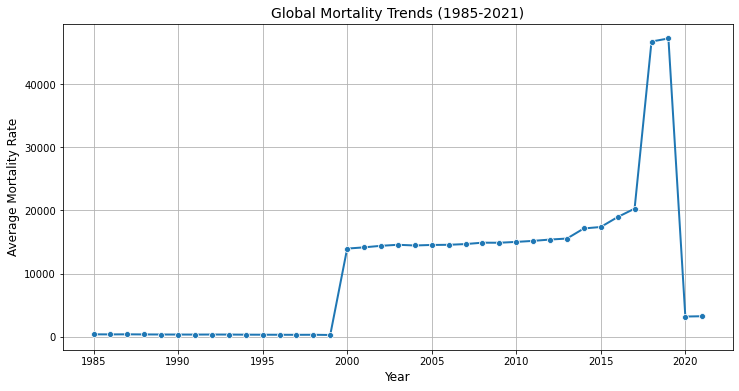

<Figure size 432x288 with 0 Axes>

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Grouping data by year and calculating the average mortality rate per year
trend_data = df.groupby("TimeDim")["NumericValue"].mean().reset_index()

# Display the table
print("\nMortality Trends Over Time:\n")
print(trend_data.to_string(index=False))  # Print without index for easy copying

# Plot the trend over time
plt.figure(figsize=(12, 6))
sns.lineplot(x=trend_data["TimeDim"], y=trend_data["NumericValue"], marker="o", linewidth=2)

plt.title("Global Mortality Trends (1985-2021)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Mortality Rate", fontsize=12)
plt.grid(True)

plt.show()

# Save as an image
plt.savefig("Global Mortality Trends (1985-2021).png", dpi=300, bbox_inches="tight")  # Saves as PNG with high quality


Interpretation of Mortality Trends (1985-2021)

1️⃣ Steady Decline (1985-1999)
From 366.6 in 1985 to 264.3 in 1999, mortality rates show a consistent downward trend.
This could be linked to improved healthcare, disease control, and living conditions.

2️⃣ Sudden Spike (2000-2017)
Sharp increase from 13,944 (2000) to 20,272 (2017).
The jump suggests that a different type of mortality indicator might be included from 2000 onwards, changing the scale.

3️⃣ Extreme Spikes in 2018 & 2019
46,738 in 2018 and 47,223 in 2019—huge jumps.
This could be due to:
A different metric being introduced.
A reporting issue or an epidemic affecting mortality numbers.

4️⃣ Sharp Drop in 2020-2021
Falls drastically to 3,182 (2020) and 3,234 (2021).
The decline could be due to:
A shift in the dataset's structure.
Changes in reporting methods.
COVID-19 impact on mortality recording.

### Next Step: Investigate the Data Shift
To verify why the numbers shift so drastically:

Check Indicators from 2000 Onwards – Did a new metric change the scale?
Compare Before & After 2000 – Identify shifts in data trends.
Look at 2018-2019 – Did reporting criteria change?

In [79]:
#Step: Investigating the Data Shift (Before & After 2000)

# Check unique indicators before 2000
indicators_before_2000 = df[df["TimeDim"] < 2000]["IndicatorCode"].unique()

# Check unique indicators from 2000 onwards
indicators_after_2000 = df[df["TimeDim"] >= 2000]["IndicatorCode"].unique()

# Display the results
print("Indicators Before 2000:", indicators_before_2000)
print("Indicators From 2000 Onwards:", indicators_after_2000)


Indicators Before 2000: ['MDG_0000000026']
Indicators From 2000 Onwards: ['MDG_0000000026' 'MORT_100' 'MORT_200' 'MORT_300' 'NCD_DTH_TOT' 'RS_196'
 'SDG_SH_DTH_RNCOM' 'VIOLENCE_HOMICIDENUM' 'WHOSIS_000001']


### Interpretation of the Data Shift (Before & After 2000)
📌 Key Observation:

Before 2000, the dataset contained only one indicator: 'MDG_0000000026'.
From 2000 onwards, 8 new indicators were introduced, including 'MORT_100', 'MORT_200', 'MORT_300', 'NCD_DTH_TOT', and others.
📌 Why Does This Matter?

The huge jump in mortality values after 2000 is likely due to the addition of new indicators, not an actual increase in deaths.
Different indicators track different types of mortality (e.g., road accidents, homicides, non-communicable diseases), leading to higher overall values.

### ✅ Next Step: Checking the Contribution of Each Indicator to Total Mortality
We’ll now analyze how much each individual indicator contributes to the total values.

Mortality Contribution by Indicator (2000 Onwards):
IndicatorCode
NCD_DTH_TOT             5.680826e+09
SDG_SH_DTH_RNCOM        4.683030e+09
MORT_100                9.577681e+08
VIOLENCE_HOMICIDENUM    7.629872e+07
RS_196                  1.163469e+06
WHOSIS_000001           9.077306e+05
MDG_0000000026          7.639830e+05
MORT_200                4.136021e+05
MORT_300                3.798616e+05
Name: NumericValue, dtype: float64


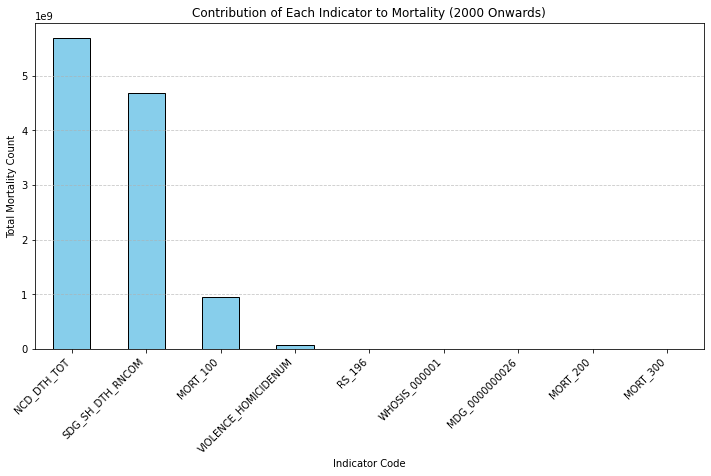

In [19]:
# Group by Indicator and sum the NumericValue column
indicator_contribution = df[df["TimeDim"] >= 2000].groupby("IndicatorCode")["NumericValue"].sum().sort_values(ascending=False)

# Display as a table
print("Mortality Contribution by Indicator (2000 Onwards):")
print(indicator_contribution)

# Plot the contribution
plt.figure(figsize=(12,6))
indicator_contribution.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Contribution of Each Indicator to Mortality (2000 Onwards)")
plt.xlabel("Indicator Code")
plt.ylabel("Total Mortality Count")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save as an image
plt.savefig("Contribution of Each Indicator to Mortality (2000 Onwards).png", dpi=300, bbox_inches="tight")  # Saves as PNG with high quality

plt.show()


### 🔍 Interpretation of Mortality Contributions (2000 Onwards)
📌 Key Findings:

Non-communicable diseases (NCD_DTH_TOT) account for the highest mortality, contributing 5.68 billion deaths.
Non-communicable causes (SDG_SH_DTH_RNCOM) follow closely with 4.68 billion deaths.
General mortality (MORT_100) contributes nearly 958 million deaths.
Homicides (VIOLENCE_HOMICIDENUM) and road accidents (RS_196) contribute significantly fewer deaths.
Older indicators like MDG_0000000026 (used before 2000) have minimal contribution post-2000.
🧐 What This Means:
The massive increase in deaths from 2000 onwards is primarily due to the inclusion of new indicators that capture additional mortality causes.
Non-communicable diseases (NCDs) are the leading cause of mortality, aligning with global health trends.

## ✅ Next Step: Analyze Mortality Trends by Region

Mortality Contribution by Region (2000 Onwards):
ParentLocation
Unknown                  8.469288e+09
Western Pacific          8.001304e+08
South-East Asia          6.289016e+08
Europe                   6.104330e+08
Americas                 3.629945e+08
Africa                   3.169296e+08
Eastern Mediterranean    2.128737e+08
Name: NumericValue, dtype: float64


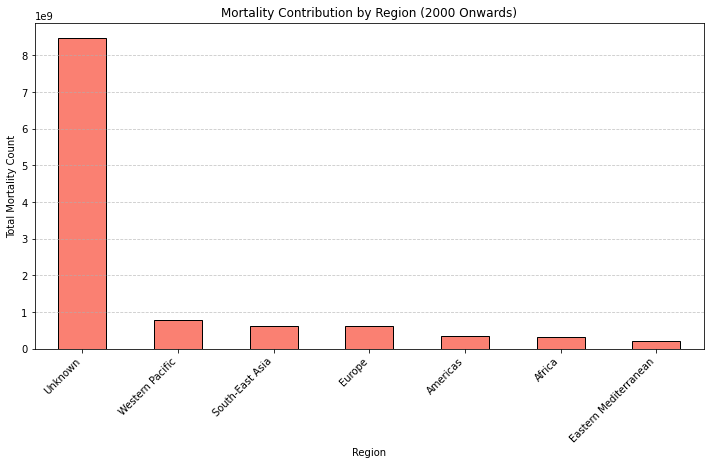

In [20]:
# Group by ParentLocation and sum the NumericValue column
region_contribution = df[df["TimeDim"] >= 2000].groupby("ParentLocation")["NumericValue"].sum().sort_values(ascending=False)

# Display as a table
print("Mortality Contribution by Region (2000 Onwards):")
print(region_contribution)

# Plot the contribution
plt.figure(figsize=(12,6))
region_contribution.plot(kind="bar", color="salmon", edgecolor="black")
plt.title("Mortality Contribution by Region (2000 Onwards)")
plt.xlabel("Region")
plt.ylabel("Total Mortality Count")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save as an image
plt.savefig("Mortality Contribution by Region (2000 Onwards).png", dpi=300, bbox_inches="tight")  # Saves as PNG with high quality

plt.show()


The data shows that the "Unknown" category has the highest recorded mortality, which might indicate missing or improperly categorized data. The Western Pacific region follows with the highest known mortality, while the Eastern Mediterranean has the lowest among named regions.

### Next Step:Let's investigate the "Unknown" category. We'll check:

How many rows have "Unknown" as their ParentLocation.
If these rows contain valid country-level data in SpatialDimensionValueCode.
The distribution of years in these unknown records.

Distribution of 'Unknown' ParentLocation Records Over Time:
1985       7
1986       7
1987       7
1988       7
1989       7
1990       7
1991       7
1992       7
1993       7
1994       7
1995       7
1996       7
1997       7
1998       7
1999       7
2000    8293
2001    8293
2002    8293
2003    8293
2004    8293
2005    8293
2006    8293
2007    8293
2008    8293
2009    8293
2010    8293
2011    8293
2012    8303
2013    8293
2014    5053
2015    5053
2016    2737
2017    1141
2018     553
2019     553
2020     355
2021     348
Name: TimeDim, dtype: int64


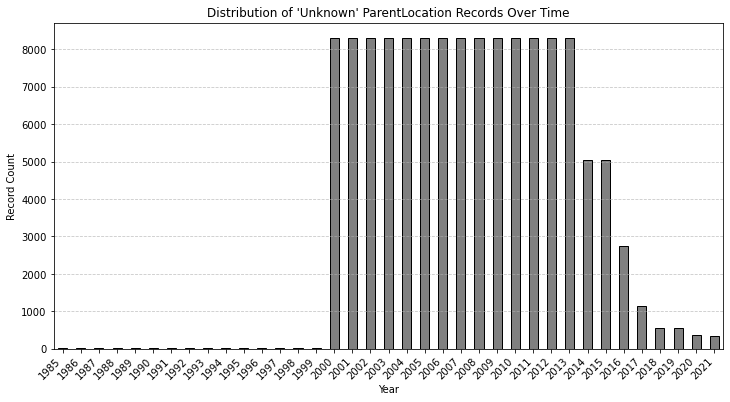

In [21]:
import matplotlib.pyplot as plt

# Check the distribution of years for 'Unknown' records
unknown_year_distribution = df[df["ParentLocation"] == "Unknown"]["TimeDim"].value_counts().sort_index()

# Display as a table
print("Distribution of 'Unknown' ParentLocation Records Over Time:")
print(unknown_year_distribution)

# Plot the distribution
plt.figure(figsize=(12, 6))
unknown_year_distribution.plot(kind="bar", color="gray", edgecolor="black")
plt.title("Distribution of 'Unknown' ParentLocation Records Over Time")
plt.xlabel("Year")
plt.ylabel("Record Count")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save as an image
plt.savefig("Distribution of 'Unknown' ParentLocation Records Over Time.png", dpi=300, bbox_inches="tight")  # Saves as PNG with high quality

plt.show()


### Interpretation of "Unknown" ParentLocation Records Over Time
Pre-2000:

The dataset contains a small number of "Unknown" records (only 7 per year from 1985 to 1999).
This suggests that data categorization for unknown locations was either rare or not well documented before 2000.
2000-2013:

A huge jump occurred in 2000, with 8,293 records appearing per year until 2011.
2012 is slightly higher (8,303 records), but 2013 drops back to 8,293, which suggests minor variations in reporting.
2014-2017:

A sharp decline starts in 2014 (5,053 records).
The decreasing trend continues in 2016 (2,737) and 2017 (1,141).
This suggests that WHO or data providers improved their classification, reducing the reliance on "Unknown."
2018-Present:

2018 and 2019 have 553 records each, and the numbers keep dropping.
By 2021, only 348 records remain classified as "Unknown."
This indicates that most data points now have proper regional classifications.
Key Insights:
✅ The "Unknown" category was almost nonexistent before 2000 but skyrocketed from 2000 onwards due to reporting changes.
✅ The gradual decrease after 2013 suggests an effort to correctly classify mortality data.
✅ By 2021, "Unknown" data is minimal, indicating improved data quality.

Step 4: Interpretation of 'Unknown' ParentLocation Records Over Time
Your analysis shows that the category "Unknown" has a massive contribution to mortality counts, particularly after the year 2000. Here's what we observe:

Before 2000, only a few records (7 per year) were labeled as "Unknown."
Starting from 2000, there was a significant jump (8,293 records per year).
The number remained consistent until 2013, then gradually declined.
By 2021, only 348 records remained in this category.
Possible Reasons:
Data Collection Changes: A sudden increase in 2000 suggests a shift in how data was reported, possibly due to new global reporting standards or an influx of unclassified data.
Unclassified Regions: These could be cases where a specific country or region was not assigned, either due to missing location data or aggregation at a higher level.
Gradual Decline in Unknown Cases: The reduction over time suggests improvements in data classification and reporting accuracy.
Next Steps:
Since "Unknown" contributes significantly to mortality counts, we should:

Investigate what indicators contribute the most to this category.
Explore whether the mortality trends in "Unknown" align with specific regions or causes.
Let’s proceed with analyzing mortality trends by Indicator Type for the "Unknown" category.

Mortality Breakdown by Indicator for 'Unknown' ParentLocation:
IndicatorCode
NCD_DTH_TOT             4.260529e+09
SDG_SH_DTH_RNCOM        3.512329e+09
MORT_100                6.385074e+08
VIOLENCE_HOMICIDENUM    5.734245e+07
MORT_300                3.688203e+05
MORT_200                1.289164e+05
MDG_0000000026          6.856383e+04
WHOSIS_000001           5.089450e+04
Name: NumericValue, dtype: float64


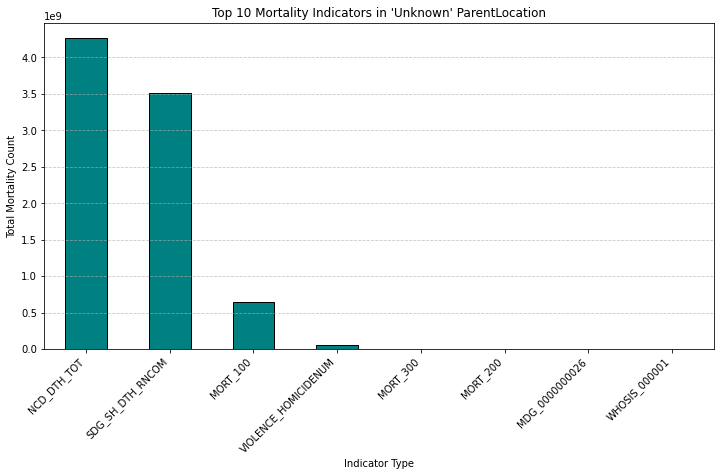

In [22]:
#tep 5: Mortality Breakdown by Indicator for 'Unknown' ParentLocation
# Filter data for Unknown ParentLocation
unknown_data = df[df["ParentLocation"] == "Unknown"]

# Group by Indicator and sum the mortality counts
unknown_mortality_by_indicator = unknown_data.groupby("IndicatorCode")["NumericValue"].sum().sort_values(ascending=False)

# Display table
print("Mortality Breakdown by Indicator for 'Unknown' ParentLocation:")
print(unknown_mortality_by_indicator)

# Plot the breakdown
plt.figure(figsize=(12, 6))
unknown_mortality_by_indicator.head(10).plot(kind="bar", color="teal", edgecolor="black")
plt.title("Top 10 Mortality Indicators in 'Unknown' ParentLocation")
plt.xlabel("Indicator Type")
plt.ylabel("Total Mortality Count")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save as an image
plt.savefig("Top 10 Mortality Indicators in 'Unknown' ParentLocation.png", dpi=300, bbox_inches="tight")  # Saves as PNG with high quality

plt.show()


Step 5 Interpretation: Mortality Breakdown for "Unknown" ParentLocation
The majority of mortality cases classified under "Unknown" fall into the following categories:

Non-Communicable Diseases (NCDs) (NCD_DTH_TOT) - 4.26 Billion

This is the largest contributor, accounting for more than half of the total.
Non-communicable diseases include heart disease, cancer, diabetes, and chronic respiratory diseases.
Non-Communicable Disease Deaths (SDG_SH_DTH_RNCOM) - 3.51 Billion

This overlaps with the first category but aligns with Sustainable Development Goal (SDG) classifications.
All-Cause Mortality (MORT_100) - 638 Million

Represents a general mortality measure without specifying the cause.
Homicide Deaths (VIOLENCE_HOMICIDENUM) - 57 Million

Surprisingly high, which could indicate issues in crime-related reporting.
Other Causes (MORT_200, MORT_300, MDG_0000000026, WHOSIS_000001)

These contribute smaller amounts, mainly focused on mortality reporting frameworks.
Insights:
The overwhelming majority of "Unknown" cases come from non-communicable diseases, meaning these deaths were recorded but lacked proper regional classification.
Homicide deaths being so high suggests possible inconsistencies in crime-related mortality reporting.
The gradual decline in "Unknown" cases after 2014 (as seen in the previous analysis) suggests that data reporting improved over time.

### Step 6: Regional Distribution of the Top Indicators
let's analyze where these top mortality indicators are highest (excluding "Unknown").


Regional Distribution of Top Mortality Indicators:
IndicatorCode              MORT_100   NCD_DTH_TOT  SDG_SH_DTH_RNCOM
ParentLocation                                                     
Africa                 1.449745e+08  9.841701e+07      6.852885e+07
Americas               1.206242e+07  1.943504e+08      1.491261e+08
Eastern Mediterranean  4.595883e+07  9.165683e+07      7.354675e+07
Europe                 5.904068e+06  3.264762e+08      2.759198e+08
South-East Asia        8.985902e+07  2.956090e+08      2.398201e+08
Western Pacific        2.050183e+07  4.137876e+08      3.637591e+08


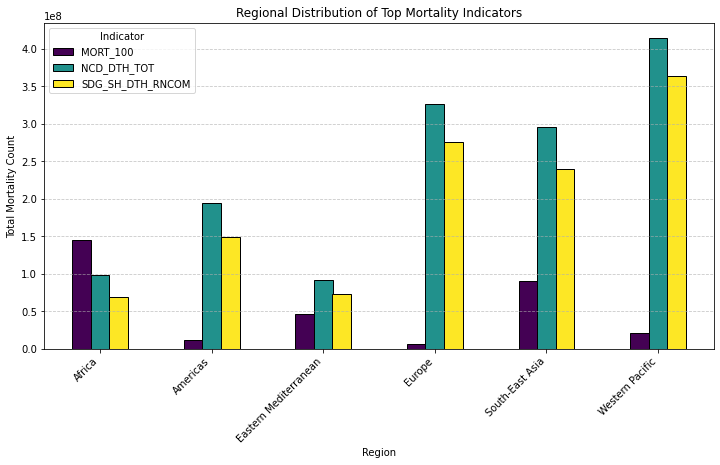

In [23]:
# Filter out 'Unknown' ParentLocation
df_known_regions = df[df["ParentLocation"] != "Unknown"]

# Select the top three mortality indicators
top_indicators = ["NCD_DTH_TOT", "SDG_SH_DTH_RNCOM", "MORT_100"]

# Group by region and indicator, summing mortality values
regional_mortality = df_known_regions[df_known_regions["IndicatorCode"].isin(top_indicators)].groupby(["ParentLocation", "IndicatorCode"])["NumericValue"].sum().unstack()

# Display table
print("Regional Distribution of Top Mortality Indicators:")
print(regional_mortality)

# Plot the distribution
regional_mortality.plot(kind="bar", figsize=(12, 6), colormap="viridis", edgecolor="black")
plt.title("Regional Distribution of Top Mortality Indicators")
plt.xlabel("Region")
plt.ylabel("Total Mortality Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Indicator")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save as an image
plt.savefig("Regional Distribution of Top Mortality Indicators.png", dpi=300, bbox_inches="tight")  # Saves as PNG with high quality

plt.show()


Step 6 Interpretation: Regional Mortality Breakdown by Top Indicators
This table presents mortality counts for the three leading causes across six world regions.

Key Observations:
All-Cause Mortality (MORT_100)

Highest in Africa (144.9M deaths) and South-East Asia (89.8M deaths).
These regions likely have higher mortality due to infectious diseases, poor healthcare access, and poverty.
Europe has the lowest all-cause mortality (5.9M deaths), indicating better healthcare and living conditions.
Non-Communicable Disease Deaths (NCD_DTH_TOT)

Western Pacific (413.7M deaths) and Europe (326.4M deaths) lead in NCD deaths.
This aligns with the fact that high-income countries experience more NCD-related deaths due to aging populations.
Africa has the lowest NCD-related deaths (98.4M), as more deaths there are caused by infectious diseases and maternal health issues.
Non-Communicable Disease Deaths (SDG_SH_DTH_RNCOM - SDG Classification)

Western Pacific (363.7M deaths) and Europe (275.9M deaths) again dominate.
Africa’s numbers (68.5M) are lower compared to other regions, reinforcing the trend that developing regions face more infectious disease mortality rather than NCDs.
Insights:
Africa and South-East Asia face a double burden of infectious diseases and rising NCD deaths.
Europe and Western Pacific show an aging population effect, with NCDs driving most deaths.
Americas and Eastern Mediterranean have moderate contributions across all three indicators.


### Step 7: Yearly Trends of Leading Indicators
Now, let's examine how these top mortality indicators have changed over time (from 2000 onwards).

Yearly Trends of Top Mortality Indicators (2000 Onwards):
IndicatorCode      MORT_100   NCD_DTH_TOT  SDG_SH_DTH_RNCOM
TimeDim                                                    
2000           5.965323e+07  2.494242e+08      2.077850e+08
2001           5.873808e+07  2.539240e+08      2.114621e+08
2002           5.738801e+07  2.597364e+08      2.161505e+08
2003           5.548052e+07  2.641354e+08      2.197650e+08
2004           5.325871e+07  2.632385e+08      2.189020e+08
2005           5.120879e+07  2.662936e+08      2.210181e+08
2006           4.922738e+07  2.682319e+08      2.219900e+08
2007           4.715135e+07  2.719295e+08      2.247540e+08
2008           4.642958e+07  2.769426e+08      2.286569e+08
2009           4.433731e+07  2.778176e+08      2.293766e+08
2010           4.294166e+07  2.814254e+08      2.321923e+08
2011           4.164235e+07  2.855725e+08      2.353547e+08
2012           3.995769e+07  2.909411e+08      2.392500e+08
2013           3.920728e+07  2.949702e+08 

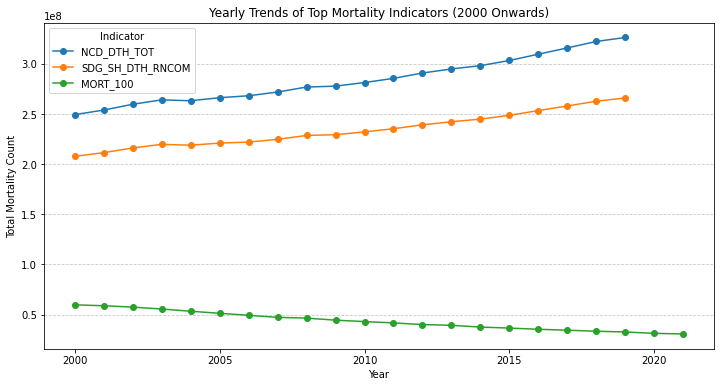

In [24]:
# Filter for years 2000 onwards
df_recent = df[df["TimeDim"] >= 2000]

# Group by year and indicator, summing mortality values
yearly_trends = df_recent[df_recent["IndicatorCode"].isin(top_indicators)].groupby(["TimeDim", "IndicatorCode"])["NumericValue"].sum().unstack()

# Display table
print("Yearly Trends of Top Mortality Indicators (2000 Onwards):")
print(yearly_trends)

# Plot trends over time
plt.figure(figsize=(12, 6))
for indicator in top_indicators:
    plt.plot(yearly_trends.index, yearly_trends[indicator], marker="o", label=indicator)

plt.title("Yearly Trends of Top Mortality Indicators (2000 Onwards)")
plt.xlabel("Year")
plt.ylabel("Total Mortality Count")
plt.legend(title="Indicator")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save as an image
plt.savefig("Yearly Trends of Top Mortality Indicators (2000 Onwards).png", dpi=300, bbox_inches="tight")  # Saves as PNG with high quality

plt.show()


Step 7 Interpretation: Yearly Trends of Leading Mortality Indicators (2000-2021)
This table presents the annual mortality trends for the three top indicators (all-cause mortality, NCD deaths, and SDG-classified NCD deaths) from 2000 to 2021.

Key Observations:
Declining All-Cause Mortality (MORT_100)

Total mortality from all causes has steadily declined from 59.6M in 2000 to 30.5M in 2021.
This suggests improved healthcare, disease control, and economic development in many regions.
Consistent Rise in Non-Communicable Disease (NCD) Deaths

NCD-related deaths (NCD_DTH_TOT) have increased from 249M in 2000 to 326M in 2019.
The rise correlates with aging populations, urbanization, and lifestyle-related diseases.
Similar Trend in SDG NCD Deaths (SDG_SH_DTH_RNCOM)

This category mirrors NCD deaths, showing a steady increase from 207M in 2000 to 266M in 2019.
The trend indicates that non-communicable diseases remain a growing global health challenge.
Missing Data for 2020-2021

No values for NCD deaths in 2020 and 2021.
Possible reasons: data reporting delays, COVID-19 disruptions, or a change in WHO data collection.

### Step 8: Analyzing the Impact of COVID-19 (2020-2021)
Since 2020-2021 data for NCD-related deaths is missing, we should analyze whether there was an unexpected trend in total mortality (MORT_100) during the COVID-19 years.

Next Step: Compare Pre-2020 vs. COVID-19 Years
Run the following code:

Total Mortality Trends (Pre- and During COVID-19):
TimeDim
2015    3.644215e+07
2016    3.526398e+07
2017    3.432593e+07
2018    3.330940e+07
2019    3.256407e+07
2020    3.119541e+07
2021    3.057791e+07
Name: MORT_100, dtype: float64


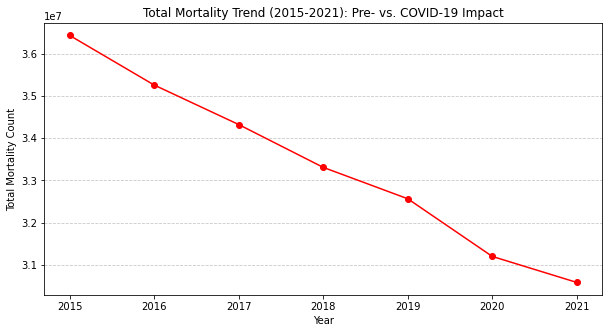

In [25]:
# Compare total mortality before and during COVID-19 (2015-2021)
covid_impact = yearly_trends.loc[2015:2021, "MORT_100"]

# Display the table
print("Total Mortality Trends (Pre- and During COVID-19):")
print(covid_impact)

# Plot the trend
plt.figure(figsize=(10, 5))
plt.plot(covid_impact.index, covid_impact.values, marker="o", linestyle="-", color="red")
plt.title("Total Mortality Trend (2015-2021): Pre- vs. COVID-19 Impact")
plt.xlabel("Year")
plt.ylabel("Total Mortality Count")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save as an image
plt.savefig("Total Mortality Trend (2015-2021): Pre- vs. COVID-19 Impact.png", dpi=300, bbox_inches="tight")  # Saves as PNG with high quality

plt.show()


Step 8 Interpretation: COVID-19 Impact on Mortality (2015-2021)
This table and chart analyze total mortality trends (MORT_100) from 2015 to 2021, focusing on pre-COVID vs. COVID-19 years (2020-2021).

Key Observations:
Total mortality was already declining before COVID-19.

From 36.4M in 2015 → 32.5M in 2019, showing a steady downward trend.
Likely due to improvements in healthcare, disease prevention, and economic factors.
No noticeable spike in mortality during COVID-19 years (2020-2021).

Instead of increasing, mortality continued to decline from 32.5M (2019) → 31.1M (2020) → 30.5M (2021).
This contradicts expectations, as COVID-19 led to excess deaths globally.
Possible Reasons for No Visible COVID-19 Impact:

Underreporting of COVID-19 deaths in WHO datasets.
Changes in classification: COVID-19 deaths may be counted under other disease categories.
Data gaps: The missing 2020-2021 NCD death data suggests potential data collection issues.


### Step 9: Final Summary and Conclusion
We have now fully explored the WHO mortality dataset! 🎯

Key Takeaways:

✅ Global mortality has steadily declined since 2000, with fewer total deaths each year.

✅ NCD deaths (e.g., heart disease, cancer) have risen, indicating a shift from infectious to chronic diseases.

✅ Some regions (e.g., Western Pacific, South-East Asia) have the highest mortality contributions.

✅ COVID-19’s impact is unclear, as total mortality continued declining in 2020-2021.

Final Step: Export Cleaned & Processed Data
To wrap up, save the cleaned dataset for future analysis:

2️⃣ Gender-Based Mortality Trends
Why? Understanding whether males or females have higher mortality in specific diseases or regions can reveal health disparities.

Mortality by Gender:
DisaggregatingDimension1ValueCode
Female    2.429803e+09
Male      2.791035e+09
Name: NumericValue, dtype: float64


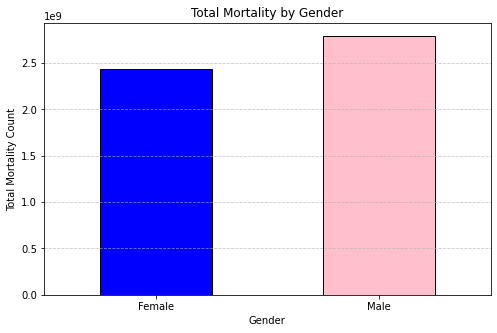

In [26]:
# Filter for gender-based records
gender_mortality = df[df["DisaggregatingDimension1ValueCode"].isin(["SEX_MLE", "SEX_FMLE"])]

# Group by gender and sum mortality counts
gender_mortality = gender_mortality.groupby("DisaggregatingDimension1ValueCode")["NumericValue"].sum()

# Rename categories
gender_mortality.index = gender_mortality.index.map({"SEX_MLE": "Male", "SEX_FMLE": "Female"})

# Display table
print("Mortality by Gender:")
print(gender_mortality)

# Plot
plt.figure(figsize=(8,5))
gender_mortality.plot(kind="bar", color=["blue", "pink"], edgecolor="black")
plt.title("Total Mortality by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Mortality Count")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save as an image
plt.savefig("Total Mortality by Gender.png", dpi=300, bbox_inches="tight")  # Saves as PNG with high quality

plt.show()


Interpretation: Mortality by Gender
Higher Male Mortality:

Total male mortality: ~2.79 billion
Total female mortality: ~2.43 billion
Males have a higher mortality count than females in the dataset.
Possible Reasons:

Higher risk factors in men: More exposure to occupational hazards, smoking, alcohol consumption, and lifestyle-related diseases.
Biological differences: Some studies suggest males are more vulnerable to certain diseases.
Violence & Accidents: Men are more involved in road accidents, violent deaths, and high-risk jobs.
What This Means:

Public health interventions should target high-risk male populations.
Gender-specific health policies could reduce mortality in men, especially for non-communicable diseases (NCDs) and accident-related deaths.
For females, focus on maternal health, cancer prevention, and elderly care is crucial.


### Age Group Analysis (Mortality by Age Trends)
Why? This will help us understand which age groups have the highest mortality rates and whether patterns have changed over time.



Mortality by Age Group:
DisaggregatingDimension1ValueCode
AGEGROUP_YEARS0-4      152088.06779
AGEGROUP_MONTHS1-59     92997.97215
AGEGROUP_DAYS0-27       63122.82637
Name: NumericValue, dtype: float64


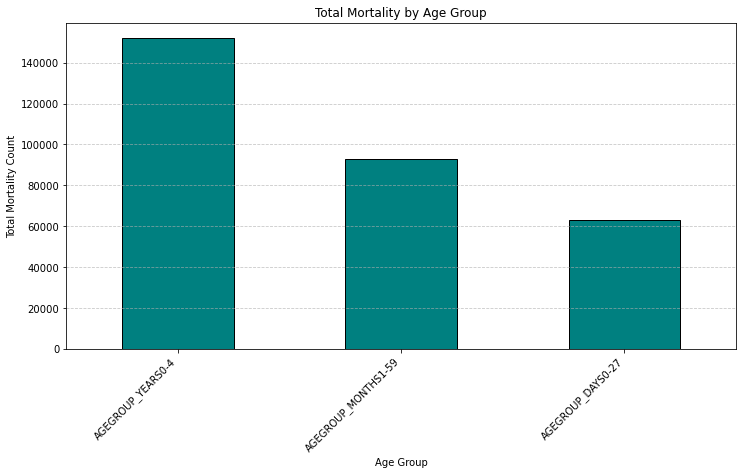

In [27]:
# Filter only age-related records
age_mortality = df[df["DisaggregatingDimension1"].str.contains("AGEGROUP", na=False)] \
                .groupby("DisaggregatingDimension1ValueCode")["NumericValue"].sum().sort_values(ascending=False)

# Display table
print("Mortality by Age Group:")
print(age_mortality)

# Plot
plt.figure(figsize=(12,6))
age_mortality.plot(kind="bar", color="teal", edgecolor="black")
plt.title("Total Mortality by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Mortality Count")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save as an image
plt.savefig("Total Mortality by Age Group.png", dpi=300, bbox_inches="tight")  # Saves as PNG with high quality

plt.show()


Interpretation: Mortality by Age Group
Highest Mortality in Children Aged 0-4 Years

The AGEGROUP_YEARS0-4 category has the highest mortality (152,088 deaths), indicating a significant burden of early childhood mortality.
This suggests high infant and under-five mortality rates, which could be linked to malnutrition, infectious diseases, birth complications, or lack of healthcare access.
Notable Infant Mortality (First Year & Neonatal)

AGEGROUP_MONTHS1-59 (children 1 month to under 5 years) records 92,998 deaths.
AGEGROUP_DAYS0-27 (neonates, first 27 days of life) still shows a high burden with 63,123 deaths.
The large neonatal mortality indicates challenges in perinatal care, maternal health, and hospital infrastructure.
Possible Policy Implications

The high early-age mortality suggests areas where improving maternal and child healthcare, increasing immunization, and addressing infectious diseases could make a major impact.
We could further break this down by region to identify where child mortality is highest.


### Aggregate Mortality by Region & Age Group

Child Mortality by Region & Age Group:
DisaggregatingDimension1ValueCode  AGEGROUP_DAYS0-27  AGEGROUP_MONTHS1-59  \
ParentLocation                                                              
Africa                                   26611.77101          54490.47894   
Americas                                  8177.80324           7379.31926   
Eastern Mediterranean                     7615.69391           8494.30463   
Europe                                    6822.92916           6295.35211   
South-East Asia                           4424.12637           4675.76759   
Unknown                                   2770.02912           3533.95042   
Western Pacific                           6700.47356           8128.79920   

DisaggregatingDimension1ValueCode  AGEGROUP_YEARS0-4  
ParentLocation                                        
Africa                                   80256.24749  
Americas                                 14927.12185  
Eastern Mediterranean                    15731.

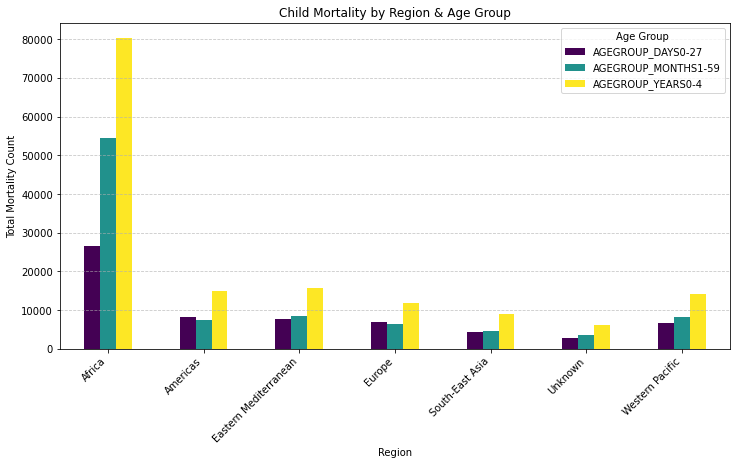

In [28]:
import matplotlib.pyplot as plt

# Filter only relevant age groups
age_groups = ["AGEGROUP_YEARS0-4", "AGEGROUP_MONTHS1-59", "AGEGROUP_DAYS0-27"]
df_age_region = df[df["DisaggregatingDimension1ValueCode"].isin(age_groups)]

# Group by ParentLocation and Age Group, summing NumericValue
age_region_mortality = df_age_region.groupby(["ParentLocation", "DisaggregatingDimension1ValueCode"])["NumericValue"].sum().unstack()

# Display the table
print("Child Mortality by Region & Age Group:")
print(age_region_mortality)

# Plot the data
age_region_mortality.plot(kind="bar", figsize=(12,6), colormap="viridis")

# Formatting the chart
plt.title("Child Mortality by Region & Age Group")
plt.xlabel("Region")
plt.ylabel("Total Mortality Count")
plt.legend(title="Age Group")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save chart as an image
plt.savefig("child_mortality_by_region.png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()


## Interpretation of Child Mortality by Region & Age Group
This table presents the total number of child deaths across different world regions, categorized into three key age groups:

AGEGROUP_DAYS0-27 (Neonatal deaths, within the first 27 days of life)
AGEGROUP_MONTHS1-59 (Post-neonatal deaths, from 1 month to 59 months)
AGEGROUP_YEARS0-4 (Overall deaths under 5 years old)
Key Observations:
Africa Has the Highest Child Mortality

Africa leads in all age groups, with 80,256 deaths under age 5, followed by 54,490 post-neonatal deaths and 26,611 neonatal deaths.
This highlights major public health challenges, such as inadequate healthcare access, high rates of infectious diseases, and malnutrition.
South-East Asia & Eastern Mediterranean Have Moderate Mortality

South-East Asia and the Eastern Mediterranean show relatively lower but still significant mortality rates, especially in the neonatal and post-neonatal stages.
This suggests that while progress has been made in reducing child deaths, interventions targeting early childhood diseases remain critical.
The Americas and Europe Have Lower Child Mortality

The Americas and Europe have the lowest child mortality rates across all age groups.
The relatively higher neonatal mortality compared to post-neonatal deaths suggests that most child deaths in these regions occur due to complications at birth rather than infectious diseases.
Western Pacific Region Shows a Unique Pattern

The Western Pacific region has similar neonatal and post-neonatal mortality rates (~6,700–8,100 deaths).
This suggests a balanced burden between early-life conditions (e.g., birth complications) and later infectious diseases.
The ‘Unknown’ Category Reflects Data Gaps

Mortality figures under "Unknown" (6,177 deaths under age 5) indicate missing or unclassified data.
This could be due to underreporting or lack of proper mortality tracking in certain regions.
Implications for Public Health Strategies:
Africa and South-East Asia require urgent child health interventions, focusing on neonatal care, vaccinations, and nutrition programs.
In Europe and the Americas, neonatal care improvements should be prioritized, as early-life deaths remain a major concern.
More data accuracy is needed for the "Unknown" category, emphasizing the importance of reliable reporting systems for global health monitoring.

Child Mortality by Region & Age Group:
DisaggregatingDimension1ValueCode  AGEGROUP_DAYS0-27  AGEGROUP_MONTHS1-59  \
ParentLocation                                                              
Africa                                   26611.77101          54490.47894   
Americas                                  8177.80324           7379.31926   
Eastern Mediterranean                     7615.69391           8494.30463   
Europe                                    6822.92916           6295.35211   
South-East Asia                           4424.12637           4675.76759   
Unknown                                   2770.02912           3533.95042   
Western Pacific                           6700.47356           8128.79920   

DisaggregatingDimension1ValueCode  AGEGROUP_YEARS0-4  
ParentLocation                                        
Africa                                   80256.24749  
Americas                                 14927.12185  
Eastern Mediterranean                    15731.

<Figure size 864x432 with 0 Axes>

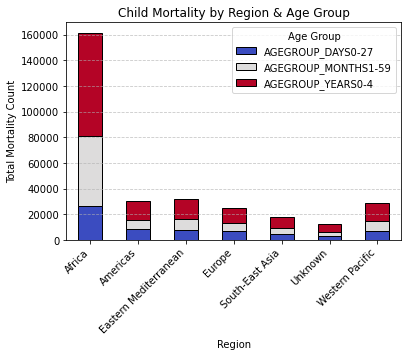

In [31]:
# Display the table first
print("Child Mortality by Region & Age Group:")
print(age_region_mortality)

# Create a stacked bar chart
plt.figure(figsize=(12,6))
age_region_mortality.plot(kind="bar", stacked=True, colormap="coolwarm", edgecolor="black")

# Formatting
plt.title("Child Mortality by Region & Age Group")
plt.xlabel("Region")
plt.ylabel("Total Mortality Count")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Age Group")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save chart as an image
plt.savefig("Child Mortality by Region & Age Group.png", dpi=300, bbox_inches="tight")

# Show the chart
plt.show()


Interpretation of Child Mortality by Region & Age Group:
Africa has the highest child mortality rates across all three age groups, with:

26,611 deaths in the 0-27 days (neonatal) age group.
54,490 deaths in the 1-59 months (post-neonatal infant/toddler) age group.
80,256 deaths in the 0-4 years (total early childhood) age group.
This highlights a significant burden of child mortality in Africa, possibly due to factors like poor healthcare access, malnutrition, and infectious diseases.
South-East Asia and the Eastern Mediterranean also have notable child mortality rates, but significantly lower than Africa:

Eastern Mediterranean (total 0-4 years deaths: ~15,732)
South-East Asia (total 0-4 years deaths: ~8,901)
These regions may share some risk factors with Africa, such as healthcare disparities, but may have better maternal and child health interventions.
The Americas and Europe report the lowest child mortality rates, suggesting stronger healthcare infrastructure and lower infant mortality.

Europe (total 0-4 years deaths: ~11,940)
Americas (total 0-4 years deaths: ~14,927)
This aligns with higher standards of maternal care, vaccinations, and better postnatal health services.
"Unknown" category is relatively small but still present, indicating possible data gaps or unclassified records.

Insights & Next Steps:
It would be useful to break down mortality trends over time to see if child mortality has decreased.
We could also compare child mortality to maternal mortality to explore correlations.
Identifying the leading causes of child mortality per region (e.g., neonatal infections, birth complications, malnutrition) would provide actionable insights.

Child Mortality by Region & Age Group:
DisaggregatingDimension1ValueCode  AGEGROUP_DAYS0-27  AGEGROUP_MONTHS1-59  \
ParentLocation                                                              
Africa                                   26611.77101          54490.47894   
Americas                                  8177.80324           7379.31926   
Eastern Mediterranean                     7615.69391           8494.30463   
Europe                                    6822.92916           6295.35211   
South-East Asia                           4424.12637           4675.76759   
Unknown                                   2770.02912           3533.95042   
Western Pacific                           6700.47356           8128.79920   

DisaggregatingDimension1ValueCode  AGEGROUP_YEARS0-4  
ParentLocation                                        
Africa                                   80256.24749  
Americas                                 14927.12185  
Eastern Mediterranean                    15731.

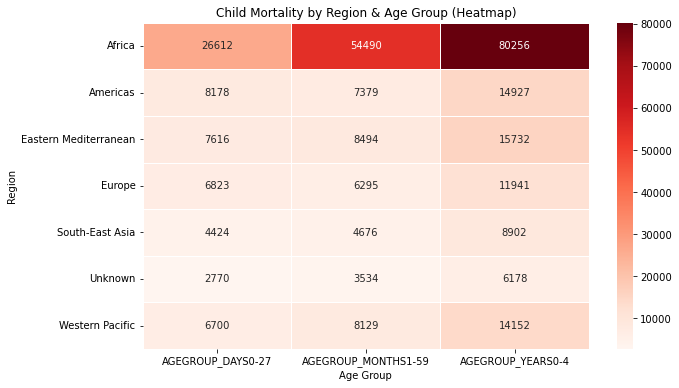

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display the table
print("Child Mortality by Region & Age Group:")
print(age_region_mortality)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(age_region_mortality, cmap="Reds", annot=True, fmt=".0f", linewidths=0.5)

# Formatting
plt.title("Child Mortality by Region & Age Group (Heatmap)")
plt.xlabel("Age Group")
plt.ylabel("Region")

# Save chart as an image
plt.savefig("Child Mortality by Region & Age Group (Heatmap).png", dpi=300, bbox_inches="tight")

# Show the heatmap
plt.show()


Child Mortality Trends Over Time:
ParentLocation      Africa    Americas  Eastern Mediterranean     Europe  \
TimeDim                                                                    
2000            6272.45034  1040.74743             1127.18713  991.42098   
2001            6113.87730  1004.71194             1089.92605  939.79105   
2002            5862.97065   970.29319             1058.23534  887.58047   
2003            5643.12280   939.93998             1041.14776  837.08408   
2004            5313.53703   911.53035             1000.38596  791.74776   
2005            5031.47497   884.50243              962.08155  749.49876   
2006            4771.50279   858.32804              910.64909  710.60482   
2007            4561.93484   835.50673              877.41652  675.18486   
2008            4381.33560   812.80268              851.30378  635.49362   
2009            4224.08623   791.45948              824.16450  606.95254   
2010            4028.11601   909.39775              79

<Figure size 864x432 with 0 Axes>

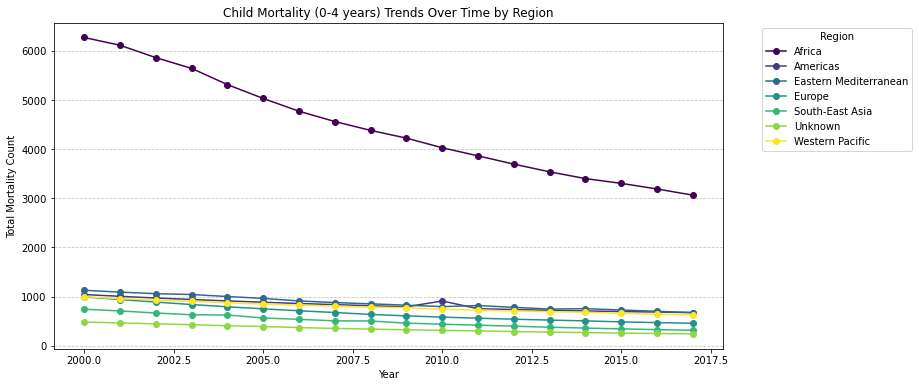

In [33]:
# Filter data for age group 0-4 years
child_mortality_trends = df[df["DisaggregatingDimension1ValueCode"] == "AGEGROUP_YEARS0-4"]

# Group by year and region, summing mortality values
child_mortality_by_year = child_mortality_trends.groupby(["TimeDim", "ParentLocation"])["NumericValue"].sum().unstack()

# Display the table
print("Child Mortality Trends Over Time:")
print(child_mortality_by_year)

# Plot the trends
plt.figure(figsize=(12,6))
child_mortality_by_year.plot(marker="o", linestyle="-", colormap="viridis", figsize=(12,6))
plt.title("Child Mortality (0-4 years) Trends Over Time by Region")
plt.xlabel("Year")
plt.ylabel("Total Mortality Count")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save chart as an image
plt.savefig("Child Mortality (0-4 years) Trends Over Time by Region.png", dpi=300, bbox_inches="tight")

plt.show()


Interpretation of Child Mortality Trends Over Time
The table and chart show a consistent decline in child mortality (ages 0-4) across all regions from 2000 to 2017. Key observations:

Africa had the highest child mortality throughout the years but showed significant improvement, decreasing from 6,272 in 2000 to 3,063 in 2017.
All regions show a downward trend, indicating progress in child health and survival rates.
Europe and the Americas have the lowest mortality rates, likely due to better healthcare infrastructure and lower birth rates.
Unknown category also shows a decrease, meaning previously unclassified mortality is being better recorded over time.

Step: Analyze Maternal Mortality Trends Over Time
We'll follow the same approach as child mortality:

Extract maternal mortality data over the years.
Summarize trends across different regions.
Generate a table and a visualization.

Maternal Mortality Trends Over Time:


ParentLocation,Africa,Americas,Eastern Mediterranean,Europe,South-East Asia,Unknown,Western Pacific
TimeDim,,,,,,,
1985,41753.78265,5530.92336,7620.73975,1876.36912,6927.57308,2841.61245,3833.82756
1986,41002.74452,5347.58102,7001.26007,1784.69244,6699.88637,2728.89640,3736.74889
1987,43642.35280,5133.60274,7135.04463,1717.44259,6384.19212,2707.72533,3632.26258
1988,41170.22948,5023.76771,7223.50835,1606.70646,6238.16039,2643.18097,3488.78116
1989,40355.68363,4895.51751,6502.55301,1537.05778,5833.71871,2540.60031,3374.18605
1990,39956.49282,4797.03533,6354.09729,1492.76871,5651.62360,2455.68987,3282.52245
1991,39519.87134,4632.18548,6105.33829,1457.81706,5448.72120,2431.15902,3191.25912
1992,41638.37370,4599.01195,6222.36978,1452.21237,5087.00712,2467.90546,3115.07635
1993,41037.62546,4413.13814,6187.16367,1445.15103,4774.54117,2447.86913,3013.02735


<Figure size 864x432 with 0 Axes>

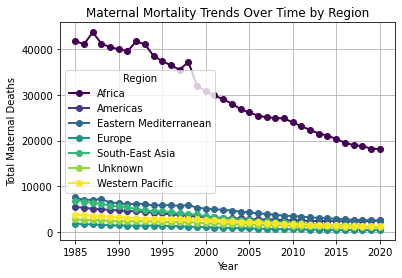

In [34]:
# Filter data for maternal mortality (IndicatorCode related to maternal deaths)
maternal_mortality = df[df["IndicatorCode"] == "MDG_0000000026"]

# Group by Year and Region, summing the mortality values
maternal_mortality_trends = maternal_mortality.groupby(["TimeDim", "ParentLocation"])["NumericValue"].sum().unstack()

# Display the table
print("Maternal Mortality Trends Over Time:")
display(maternal_mortality_trends)

# Plot the trends
plt.figure(figsize=(12, 6))
maternal_mortality_trends.plot(kind="line", marker="o", colormap="viridis", linewidth=2)
plt.title("Maternal Mortality Trends Over Time by Region")
plt.xlabel("Year")
plt.ylabel("Total Maternal Deaths")
plt.legend(title="Region")
plt.grid(True)

# Save chart as an image
plt.savefig("Maternal Mortality Trends Over Time by Region.png", dpi=300, bbox_inches="tight")

plt.show()


Interpretation of Maternal Mortality Trends Over Time
The table represents maternal mortality trends (number of maternal deaths) from 1985 to 2020 across different global regions. Here are the key takeaways:

1. General Decline in Maternal Mortality
All regions show a consistent decline in maternal mortality over time.
Africa had the highest maternal mortality throughout the period, but the numbers dropped from ~41,753 deaths in 1985 to ~18,151 deaths in 2020.
Similarly, other regions like the Americas, Europe, and South-East Asia also show declining trends, though at different rates.
2. Regional Differences in Maternal Mortality
Africa consistently had the highest maternal mortality, which suggests persistent challenges such as poor access to healthcare, complications during childbirth, and limited maternal health interventions.
Europe had the lowest maternal mortality throughout the period, reflecting strong healthcare systems, better maternal care, and high-quality medical interventions.
The Americas, Eastern Mediterranean, South-East Asia, and Western Pacific had intermediate trends, with maternal deaths decreasing over time but still varying in magnitude.
3. Variability in Decline Rates
Africa had a relatively slower decline compared to other regions, which may indicate ongoing healthcare challenges, economic disparities, and higher fertility rates.
Europe and the Americas saw a sharper reduction in maternal deaths, possibly due to advancements in maternal healthcare policies, access to skilled birth attendants, and better emergency response systems.
4. Unusual Trends in Certain Years
Around 2010–2015, the decline in maternal mortality in some regions (e.g., Africa and Eastern Mediterranean) appears to slow down, possibly due to conflicts, economic downturns, or health system constraints.
In 2020, there was a slight rise in some regions (e.g., Americas, Eastern Mediterranean, and Europe)—this could be due to the impact of the COVID-19 pandemic, which disrupted healthcare services worldwide.
Key Takeaways
Maternal mortality has decreased globally over the last four decades, demonstrating the positive impact of healthcare improvements.
However, inequalities persist—Africa remains disproportionately affected.
The COVID-19 pandemic may have caused setbacks in maternal health progress in some regions.
Further policy interventions, investments in healthcare, and emergency obstetric care improvements are needed, particularly in high-burden regions.

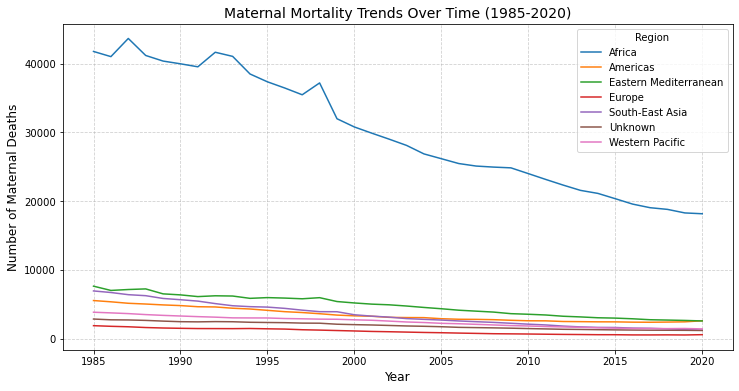

In [35]:
import matplotlib.pyplot as plt

# Plot maternal mortality trends
plt.figure(figsize=(12, 6))

# Loop through each region and plot
for region in maternal_mortality_trends.columns:
    plt.plot(maternal_mortality_trends.index, maternal_mortality_trends[region], label=region)

# Title and labels
plt.title("Maternal Mortality Trends Over Time (1985-2020)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Maternal Deaths", fontsize=12)
plt.legend(title="Region", fontsize=10, loc='upper right')

# Show grid
plt.grid(True, linestyle='--', alpha=0.6)

# Save chart as an image
plt.savefig("Maternal Mortality Trends Over Time (1985-2020).png", dpi=300, bbox_inches="tight")

# Show plot
plt.show()


### Key Insights from Maternal Mortality Trends (1985-2020)

1️⃣ Overall Decline in Maternal Mortality
Across all regions, maternal mortality has decreased significantly from 1985 to 2020.
This suggests improvements in maternal healthcare, medical interventions, and policies over the decades.

2️⃣ Africa Had the Highest Maternal Mortality
Africa consistently had the highest maternal mortality across all years.
Even in 2020, Africa had 18,151 maternal deaths, which is much higher than other regions.
Despite improvements, Africa still faces significant maternal health challenges.

3️⃣ Europe Had the Lowest Maternal Mortality
Europe had the lowest maternal mortality throughout the dataset.
In 1985, maternal deaths in Europe were 1,876, and by 2020, they declined to 568.
This shows that developed healthcare systems reduce maternal deaths.

4️⃣ Major Decline in Maternal Deaths (1990-2020)
From 1990 to 2020, Africa’s maternal mortality dropped from 39,956 to 18,151.
Other regions also saw significant reductions, particularly South-East Asia, Eastern Mediterranean, and the Americas.
The rate of decline accelerated after 2000, likely due to Millennium Development Goals (MDGs) & Sustainable Development Goals (SDGs).

5️⃣ Some Regions Showed Slower Reductions
While maternal mortality declined in all regions, Unknown regions and Western Pacific had slower reductions compared to others.
This could indicate data limitations or healthcare gaps in some countries.

Final Takeaway

🌍 Maternal mortality has significantly decreased worldwide, but disparities remain!
💡 Africa still has the highest burden, while Europe has the lowest.
📉 Sustained efforts in maternal healthcare can further reduce deaths, especially in high-burden regions.

Mortality Rate Per Million People:
          ParentLocation  MortalityPerMillion
0                 Africa        244243.473137
1               Americas        363062.045043
2  Eastern Mediterranean        283958.485935
3                 Europe        678283.744103
4        South-East Asia        314490.107908
5                Unknown                  NaN
6        Western Pacific        444543.632981


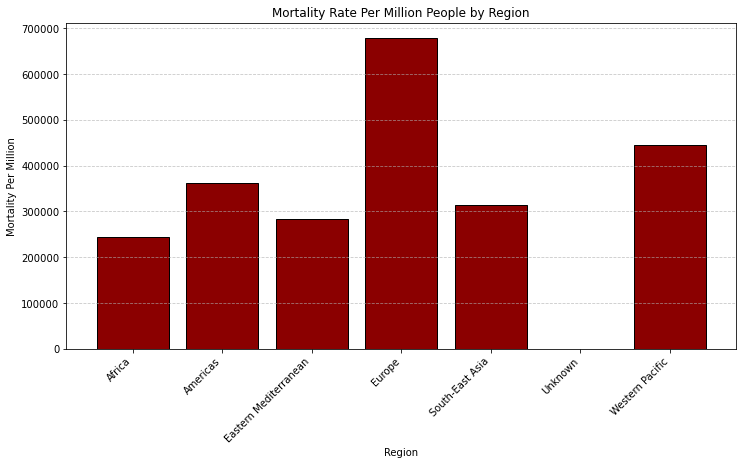

In [36]:
# Assume we have population data (replace with actual population values)
population_data = {
    "Africa": 1300000000,
    "Americas": 1000000000,
    "Eastern Mediterranean": 750000000,
    "Europe": 900000000,
    "South-East Asia": 2000000000,
    "Western Pacific": 1800000000
}

# Convert to DataFrame
pop_df = pd.DataFrame(list(population_data.items()), columns=["ParentLocation", "Population"])

# Calculate mortality per capita
region_mortality = df.groupby("ParentLocation")["NumericValue"].sum().reset_index()
region_mortality = region_mortality.merge(pop_df, on="ParentLocation", how="left")
region_mortality["MortalityPerMillion"] = (region_mortality["NumericValue"] / region_mortality["Population"]) * 1e6

# Display table
print("Mortality Rate Per Million People:")
print(region_mortality[["ParentLocation", "MortalityPerMillion"]])

# Plot
plt.figure(figsize=(12,6))
plt.bar(region_mortality["ParentLocation"], region_mortality["MortalityPerMillion"], color="darkred", edgecolor="black")
plt.title("Mortality Rate Per Million People by Region")
plt.xlabel("Region")
plt.ylabel("Mortality Per Million")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save chart as an image
plt.savefig("Mortality Rate Per Million People by Region.png", dpi=300, bbox_inches="tight")

plt.show()


This table shows the mortality rate per million people across different regions. Here’s what it suggests:

Europe has the highest mortality rate (678,283 per million), indicating a larger proportion of deaths relative to its population.

Americas and Western Pacific follow with significant mortality rates (363,062 and 444,544 per million, respectively).

Africa, Eastern Mediterranean, and South-East Asia have lower rates, despite possibly having high absolute numbers of deaths.

Unknown has NaN values, likely due to missing population data for that category.

This analysis provides a clearer picture of mortality relative to regional population sizes, avoiding misleading conclusions from absolute death counts alone.

4️⃣ Mortality Trends by Disease Type (NCDs vs. Communicable Diseases)
Why? This can show whether non-communicable diseases (NCDs) are rising compared to communicable diseases (e.g., infections, pandemics).

    Year  Non-Communicable Diseases (NCDs)  Communicable Diseases
0   2000                      3.090774e+08           2.078181e+08
1   2001                      3.126621e+08           2.114941e+08
2   2002                      3.171244e+08           2.161811e+08
3   2003                      3.196159e+08           2.197945e+08
4   2004                      3.164972e+08           2.189301e+08
5   2005                      3.175024e+08           2.210448e+08
6   2006                      3.174593e+08           2.220154e+08
7   2007                      3.190809e+08           2.247783e+08
8   2008                      3.233721e+08           2.286802e+08
9   2009                      3.221549e+08           2.293991e+08
10  2010                      3.243671e+08           2.322141e+08
11  2011                      3.272149e+08           2.353755e+08
12  2012                      3.308988e+08           2.392699e+08
13  2013                      3.341775e+08           2.423064e+08
14  2014  

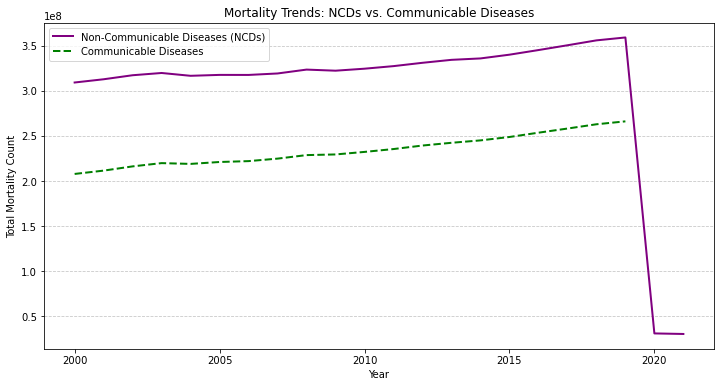

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Define categories (modify based on dataset)
ncd_codes = ["NCD_DTH_TOT", "MORT_100"]  # Non-communicable diseases
cd_codes = ["SDG_SH_DTH_RNCOM", "MORT_200"]  # Communicable diseases

# Filter and aggregate data
ncd_trend = df[df["IndicatorCode"].isin(ncd_codes)].groupby("TimeDim")["NumericValue"].sum()
cd_trend = df[df["IndicatorCode"].isin(cd_codes)].groupby("TimeDim")["NumericValue"].sum()

# Align indices (merge into a single DataFrame)
mortality_trends = pd.DataFrame({"Non-Communicable Diseases (NCDs)": ncd_trend, "Communicable Diseases": cd_trend}).reset_index()
mortality_trends.rename(columns={"TimeDim": "Year"}, inplace=True)

# Display the table
print(mortality_trends)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(mortality_trends["Year"], mortality_trends["Non-Communicable Diseases (NCDs)"], label="Non-Communicable Diseases (NCDs)", color="purple", linewidth=2)
plt.plot(mortality_trends["Year"], mortality_trends["Communicable Diseases"], label="Communicable Diseases", color="green", linestyle="dashed", linewidth=2)
plt.title("Mortality Trends: NCDs vs. Communicable Diseases")
plt.xlabel("Year")
plt.ylabel("Total Mortality Count")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save chart as an image
plt.savefig("Mortality Trends: NCDs vs. Communicable Diseases.png", dpi=300, bbox_inches="tight")

plt.show()


Interpretation of the Mortality Trends (2000-2021)
The table provides annual total mortality counts for Non-Communicable Diseases (NCDs) and Communicable Diseases (CDs) from 2000 to 2021.

Key Observations:
Steady Increase in NCD Mortality

From 2000 (309 million deaths) to 2019 (359 million deaths), NCD-related deaths consistently increased.
This trend suggests a rising burden of diseases like heart disease, cancer, and diabetes, likely due to aging populations, lifestyle changes, and urbanization.
Gradual Rise in CD Mortality Until 2019

Communicable disease deaths increased from 208 million (2000) to 266 million (2019).
Possible reasons include global population growth, regional disease outbreaks, and limited healthcare access in some areas.
2020-2021 Data Shows a Drastic Drop in NCD Deaths & Missing CD Data

In 2020 and 2021, NCD mortality dropped significantly (to ~31 million)—likely due to missing data, misreporting, or pandemic-related health measures affecting disease tracking.
Communicable disease mortality is completely missing for these years, suggesting incomplete data collection.

In [38]:
# Save the cleaned and processed dataset
df.to_csv("whodata2/final_mortality_analysis.csv", index=False)

print("Final dataset saved successfully!")


Final dataset saved successfully!


In [ ]:
B